In [38]:
import pandas as pd
marathon_2015_2017 = pd.read_csv("marathon_2015_2017.csv")
marathon_2015_2017.head(2)

,Name,Age,M/F,City,State,Country,5K,10K,15K,20K,...,25K,30K,35K,40K,Pace,Official Time,Overall,Gender,Division,Year
0,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,883,1783,2697,3629,...,4567,5520,6479,7359,296,7757,1,1,1,2015
1,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,883,1783,2698,3628,...,4567,5519,6479,7362,298,7788,2,2,2,2015


In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))  # 차트의 크기 설정

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

In [4]:
# 남녀 참가자의 비율
m = marathon_2015_2017['M/F'].value_counts()
m

M    43482
F    36156
Name: M/F, dtype: int64

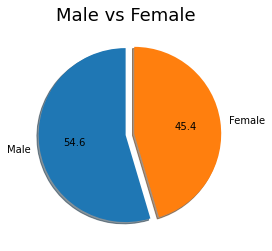

In [11]:
plt.title("Male vs Female", fontsize=18)  # 차트의 제목
# 차트에 표시될 각 구성의 제목들, 순서에 따라 그래프의 위치가 바뀜
lab = 'Male', 'Female'  
# 차트에 표시될 데이터들의 순서는 값이 큰 값들부터 작은 값으로 표시됩니다
# 각 데이터 값들의 위치는 회전으로 조절하고 순서에 맞게 라벨을 배치합니다
exp = (0, 0.1)
# 각 라벨의 순서에 따라 수치를 지정 - Male:0(멈춤), Female:0.1(0.1만큼 이동)
plt.pie(m, labels=lab, startangle=90, autopct='%.1f', explode=exp, shadow=True)
# startangle : 화면에 표시되기 전 회전 각도
# autopct : 자동 비율변환 & 출력 양식 설정
# explode : 각 구성요소 중 강조하고자 하는 조각을 얼만큼 빼서 표시할 지에 대한 설정(데이터 개수만큼 설정
# shadow : 그림자 설정
plt.show()

### 연습문제
* Age컬럼을 기준으로 Lev4 컬럼(연령대)을 새로 생성하고, 이 값을 바탕으로 Pie차트를 생성하세요

* 작성조건
1. 각 연령대는 20대 이하, 30대, 40대, 50대 이상 이렇게 네 개의 값으로 구성하세요
2. Lev4 컬럼을 생성할 때는 apply lambda 또는 연산 등을 사용하세요
3. 회전은 90도, 출력형식은 소수점 2자리까지, 가장 인원이 많은 조각만 0.1만큼 떼어내어 표현하세요
4. 그림자 효과 넣어주세요
5. 차트 제목은 "연령대별 참가자"
6. 각 조각에 라벨을 넣어주세요

In [14]:
# 한글 폰트 설정
plt.rc("font", family="Malgun Gothic")
# 폰트가 선명하게 보이도록 retina 설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

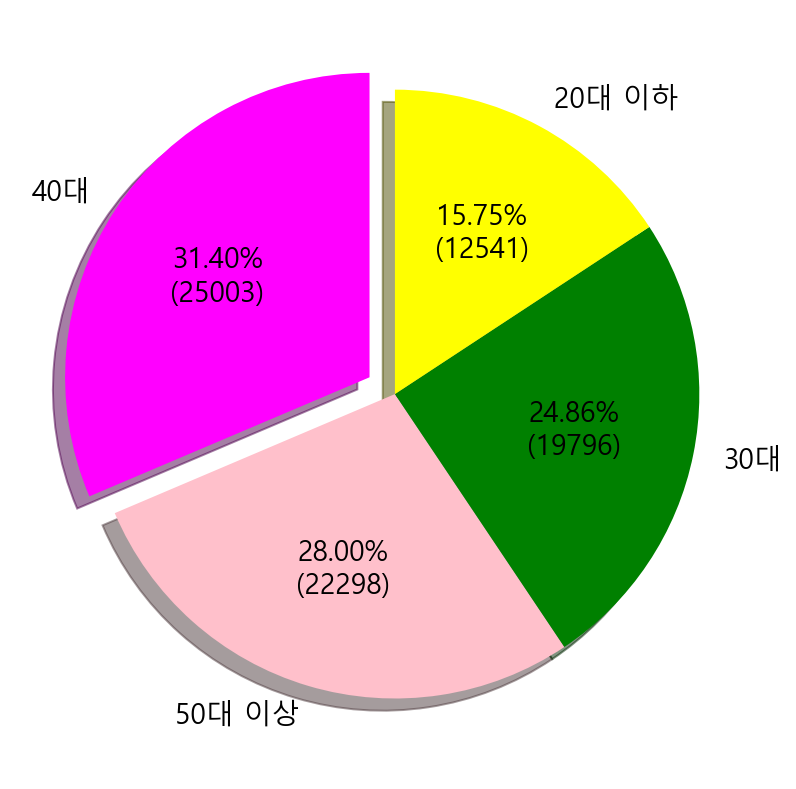

In [49]:

marathon_2015_2017['Lev4'] = marathon_2015_2017['Age'].apply(lambda x : '20대 이하' if x <= 29 else \
                                                         ('30대' if x <= 39 else \
                                                         ('40대' if x <= 49 else '50대 이상')))
a = marathon_2015_2017['Lev4'].value_counts()
#plt.title("연령대별 참가자", fontsize=18)  # 차트의 제목

# 인원수까지 쓰고자 할 때 : 함수 작성, autopct에 함수 대입
def my_fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, len(marathon_2015_2017)*x/100)
# len(marathon_2015_2017) : 데이터프레임의 데이터 건수
# x/100 : 백분율 값을 100으로 나눈 비율을 건수에 곱하여 실제 값을 얻습니다

lab = '40대','50대 이상','30대','20대 이하'
plt.figure(figsize=(7,7))
exp = (0.1,0,0,0)
plt.pie(a, labels=lab, startangle=90, autopct=my_fmt, explode=exp, shadow=True, \
       colors=['magenta','pink','green','yellow'], textprops={'fontsize':14})
plt.show()